In [1]:
import numpy as np
data = np.loadtxt("densityPlt",float)
print(np.shape(data))

(501, 501)


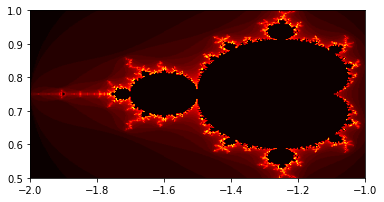

In [15]:
#Program to plot values in Mandelbrot Set
from numpy import linspace,zeros,absolute
import matplotlib.pyplot as plt

N_iterations = 50    
x1,x2,points1 = -2,0.5,300    # for x side of grid
y1,y2,points2 = -1,1,300    # for y side of grid

#set up grid
setX = linspace(x1,x2,points1)
setY = linspace(y1,y2,points2)

#array to store grid
mandlebrotSet = zeros([points1,points2], float)

#calculate array values
for i in range(len(setY)):
    for j in range(len(setX)):
        
        #initial conditions for Mandelbrot Set
        z = 0
        c = setX[j] + setY[i]*1j #second term is complex
        InTheSet = True
        
        #now we iterate each point to see if in set
        for k in range(N_iterations):
            z = z**2 + c
            #conditions
            if absolute(z)>2:
                mandlebrotSet[i,j] = k
                InTheSet = False
                break

# Now plot it
plt.imshow(mandlebrotSet,origin="lower",extent=[x1,y1,x2,y2],cmap="hot")
#plt.gray()
plt.show()

In [3]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



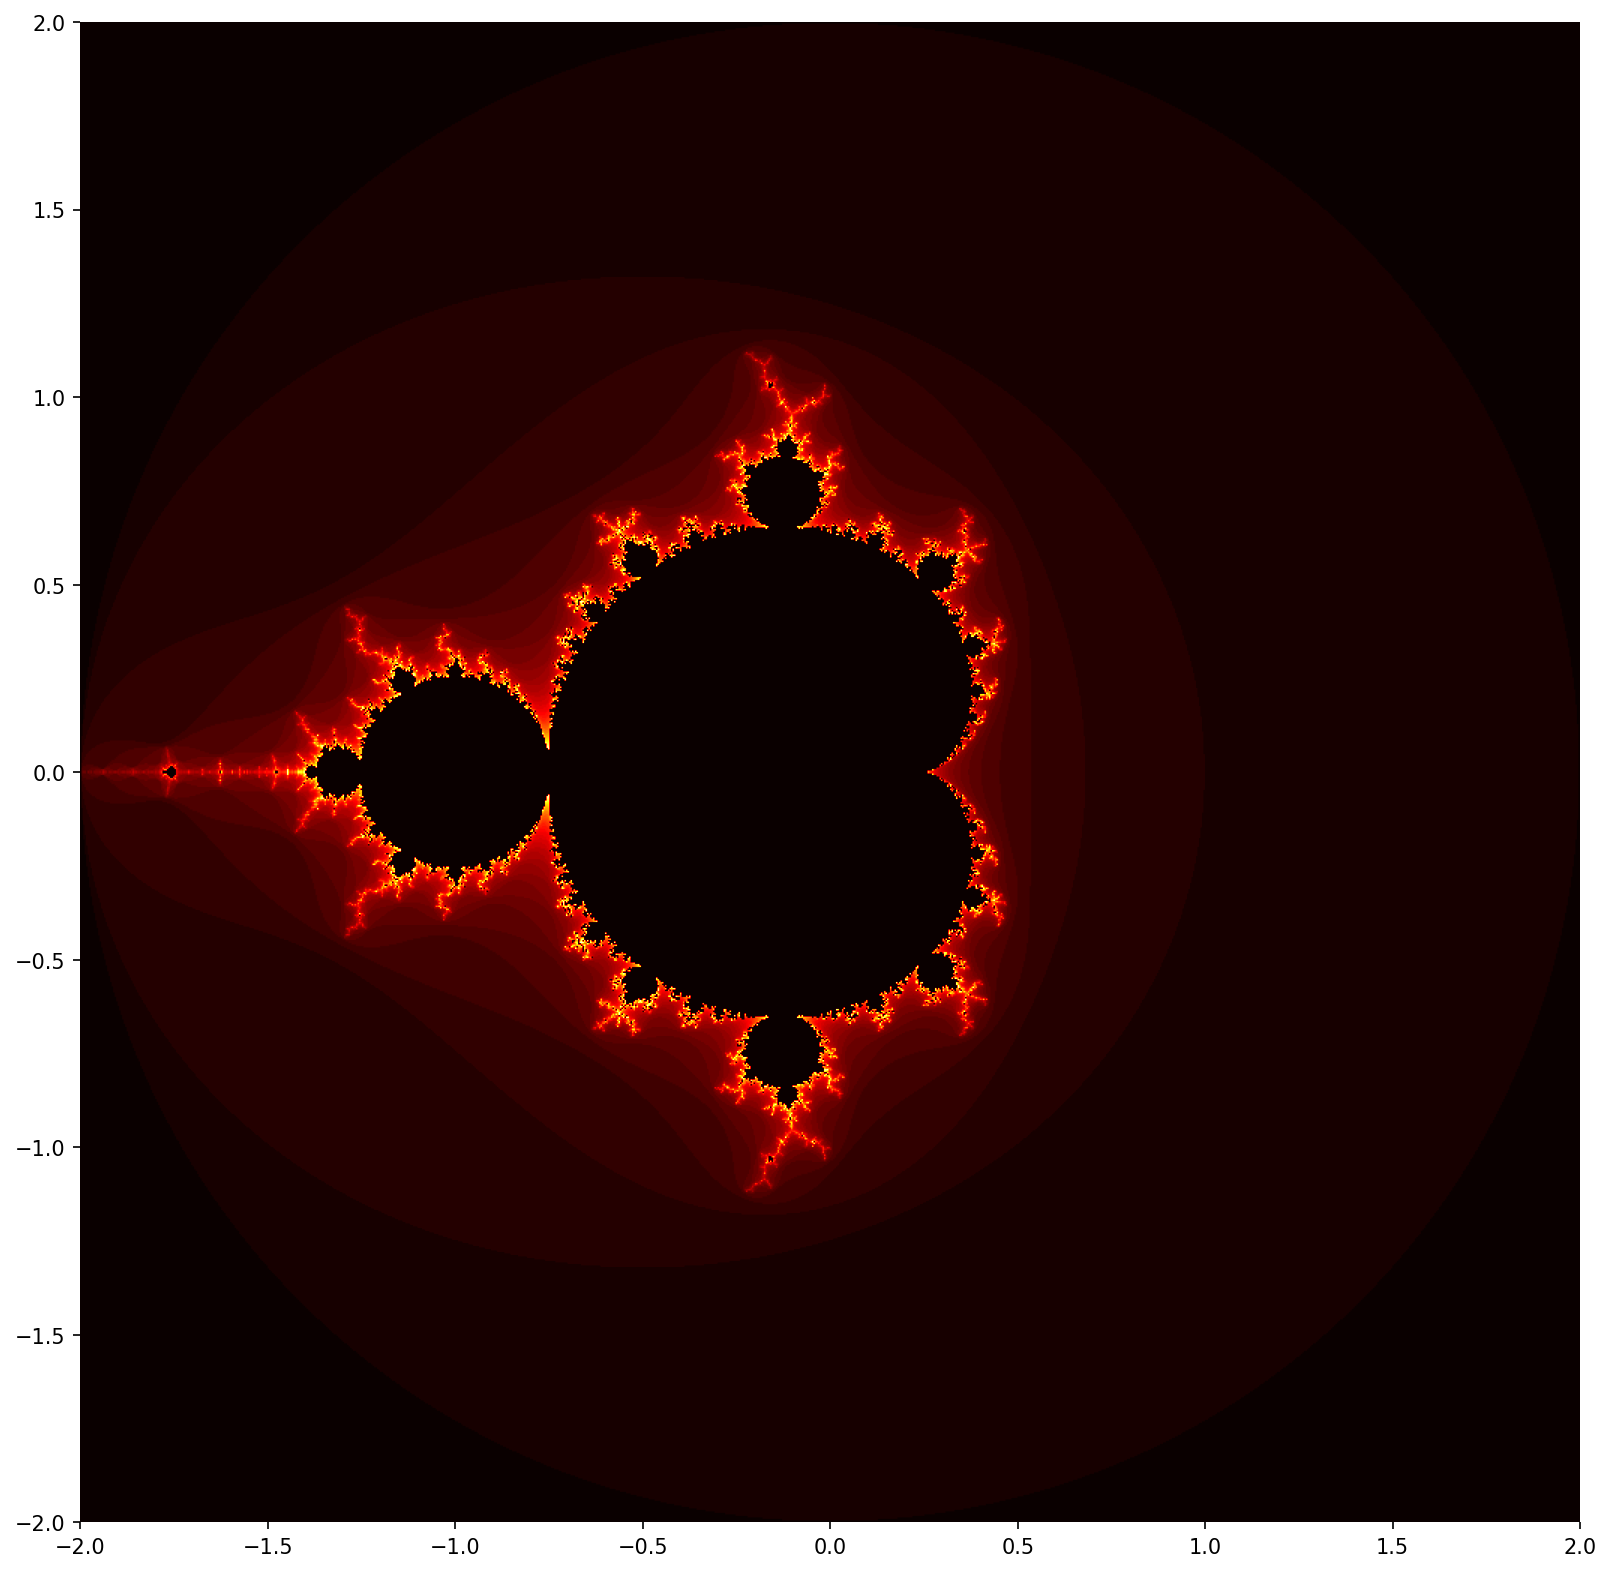

Time elapsed:  22.501716359000056 seconds


In [17]:
#Do it again more zoomed in and with a timer

from numpy import linspace,zeros,absolute
from matplotlib import pyplot as plt
import timeit

start = timeit.default_timer()  #this is time the calculation

#set up the grid
x1,x2,points1 = -2,2,1000
y1,y2,points2 = -2,2,1000
N_iterations = 50

xSet = linspace(x1,x2,points1)
ySet = linspace(y1,y2,points2)

#Array to store the grid
MandelbrotSet = zeros([points1,points2],float)

#Calculate Values
for i in range(len(ySet)):
    for j in range(len(xSet)):
        
        #initial conditions
        z = 0
        c = xSet[j] + ySet[i]*1j
        in_the_set = True
        
        #now iterate it
        for k in range(N_iterations):
            z = z**2 + c
            
            #check conditions
            if absolute(z)>2:
                MandelbrotSet[i,j] = k
                in_the_set = False
                break
                
#Print the plot
fig = plt.figure(figsize=(10,10), dpi=150) #this will make it larger
ax = fig.add_axes([0.0,0.0,1.0,1.0], frameon=False, aspect=1)
plt.imshow(MandelbrotSet, origin="lower", extent=[x1,x2,y1,y2], cmap="hot")
plt.show()

#to end the timer
stop = timeit.default_timer()
print('Time elapsed: ', stop - start, 'seconds')

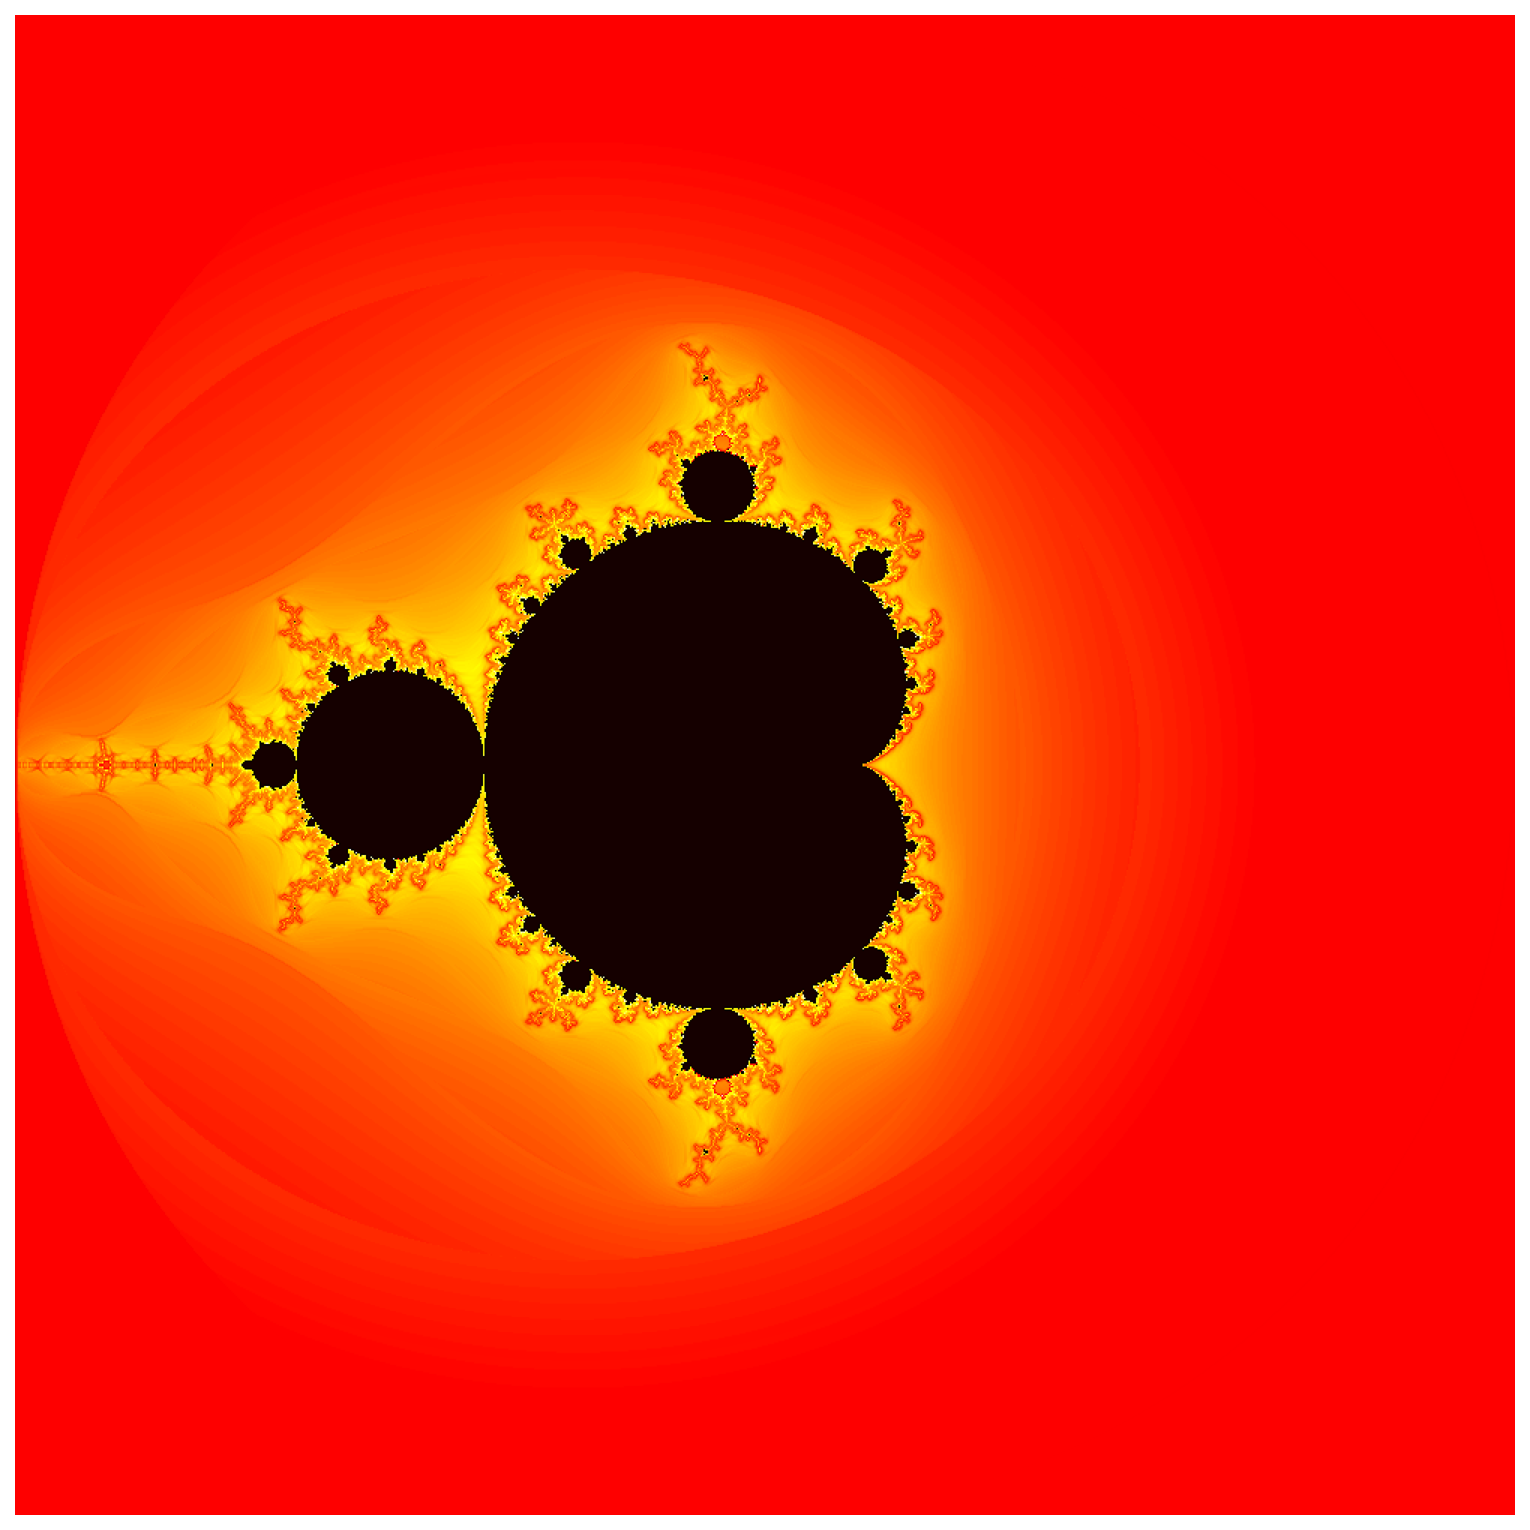

Time elapsed:  1.3813713989998178 seconds


In [21]:
#Now lets speed up the calculation by "vectorization"


#it calculates very fast because there are no for loops and we used
#functions for the calculations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import timeit

start = timeit.default_timer()

x1,x2,points1 = -2,2,1000
y1,y2,points2 = -2,2,1000
N_iterations = 200
horizon = 2

def Mandelbrot_Set(x1,x2,y1,y2,points1,points2,N_iterations,horizon=2.0):
    x = np.linspace(x1,x2,points1, dtype=np.float32)
    y = np.linspace(y1,y2,points2, dtype=np.float32)
    c = x + y[:, None]*1j  #what are those brackets for?
    N = np.zeros(c.shape, dtype=int)
    z = np.zeros(c.shape, np.complex64)
    
    for n in range(N_iterations):
        I = np.less(abs(z), horizon)
        N[I] = n
        z[I] = z[I]**2 + c[I]
        N[N==N_iterations-1] = 0
    return z, N

log_horizon = np.log(np.log(horizon))/np.log(2) #whats this for?
z, N = Mandelbrot_Set(x1,x2,y1,y2,points1,points2,N_iterations,horizon)

#idk what this part is for
with np.errstate(invalid='ignore'):
    M = np.nan_to_num(N + 1 - np.log(np.log(abs(z)))/np.log(2) + log_horizon)
    
    #for image
    dpi = 150
    width = 10
    height = 10
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0,0.0,1.0,1.0], frameon=False, aspect=1)
    
    light = colors.LightSource(azdeg=90, altdeg=90)
    M = light.shade(M,cmap=plt.cm.hot, vert_exag=1.5,norm=colors.PowerNorm(.2))
    plt.imshow(M, extent=[x1,x2,y1,y2])
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()
    stop = timeit.default_timer()
    print('Time elapsed: ', stop - start, 'seconds')

<ipython-input-1-f114f3efb13e>:18: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "Mandelbrot_Set" failed type inference due to: No implementation of function Function(<function linspace at 0x7f48781ff790>) found for signature:
 
 >>> linspace(int64, int64, int64, dtype=class(float32))
 
There are 2 candidate implementations:
   - Of which 2 did not match due to:
   Overload in function 'NdLinspace.generic': File: numba/core/typing/npydecl.py: Line 637.
     With argument(s): '(int64, int64, int64, dtype=class(float32))':
    Rejected as the implementation raised a specific error:
      AssertionError: 
  raised from /home/macink/miniconda3/lib/python3.8/site-packages/numba/core/typing/npydecl.py:638

During: resolving callee type: Function(<function linspace at 0x7f48781ff790>)
During: typing of call at <ipython-input-1-f114f3efb13e> (20)


File "<ipython-input-1-f114f3efb13e>", line 20:
def Mandelbrot_Set(x1,x2,y1,y2,points1,points

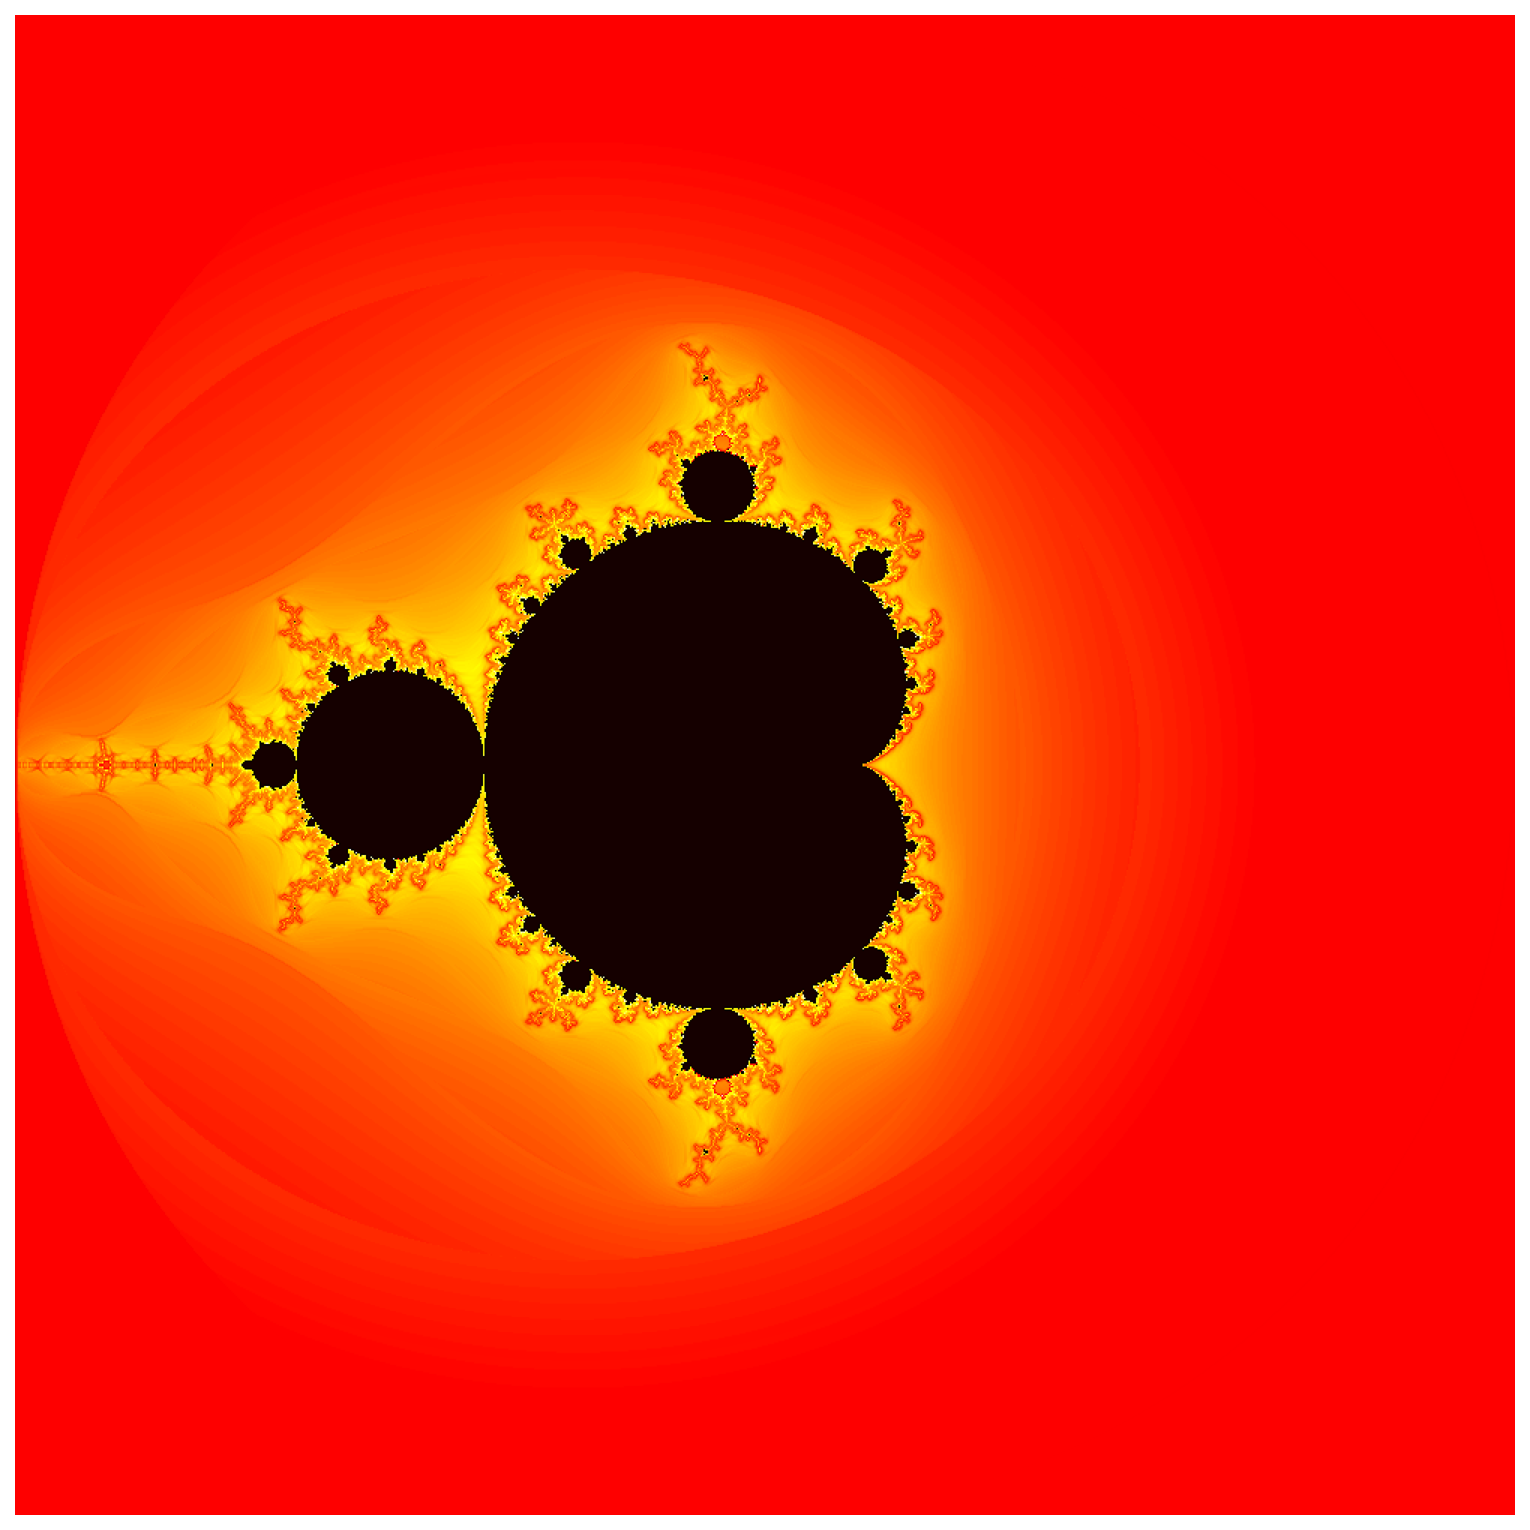

Time elapsed:  2.0923886959999436 seconds


In [1]:
#Now we can speed it up even more by using "decoration"
#from numba library

#Use same code, just add @jit decoration before calculations(functions)
#actually doesnt work with this code. lets try professors

from numba import jit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import timeit

start = timeit.default_timer()

x1,x2,points1 = -2,2,1000
y1,y2,points2 = -2,2,1000
N_iterations = 200
horizon = 2

@jit
def Mandelbrot_Set(x1,x2,y1,y2,points1,points2,N_iterations,horizon=2.0):
    x = np.linspace(x1,x2,points1, dtype=np.float32)
    y = np.linspace(y1,y2,points2, dtype=np.float32)
    c = x + y[:, None]*1j  #what are those brackets for?
    N = np.zeros(c.shape, dtype=int)
    z = np.zeros(c.shape, np.complex64)
    
    for n in range(N_iterations):
        I = np.less(abs(z), horizon)
        N[I] = n
        z[I] = z[I]**2 + c[I]
        N[N==N_iterations-1] = 0
    return z, N

log_horizon = np.log(np.log(horizon))/np.log(2) #whats this for?
z, N = Mandelbrot_Set(x1,x2,y1,y2,points1,points2,N_iterations,horizon)

#idk what this part is for
with np.errstate(invalid='ignore'):
    M = np.nan_to_num(N + 1 - np.log(np.log(abs(z)))/np.log(2) + log_horizon)
    
    #for image
    dpi = 150
    width = 10
    height = 10
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0,0.0,1.0,1.0], frameon=False, aspect=1)
    
    light = colors.LightSource(azdeg=90, altdeg=90)
    M = light.shade(M,cmap=plt.cm.hot, vert_exag=1.5,norm=colors.PowerNorm(.2))
    plt.imshow(M, extent=[x1,x2,y1,y2])
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()
    stop = timeit.default_timer()
    print('Time elapsed: ', stop - start, 'seconds')